# Chest X-Ray (Pheumonia) dataset

Dataset descargado de [kaggle](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia/metadata)
- 5,863 imágenes 
- 2 categorías



Información:
- Los datos se obtienen en la URL de kaggle especificada arriba.
- La ruta para cargar modelos y json deben añadir <code>"models/"</code> pues han sido organizados en esta carpeta.
- Los modelos no están subidos en github porque ocupan 100+ MB.
- La mayoría de modelos fueron entrenados en **kaggle notebooks** con GPU.

* El modelo final que se utiliza en este proyecto está alojado en [Google Drive](https://drive.google.com/file/d/1AU9fydWFR7_Mpsu-w3E34b9wwbg_kHR7/view?usp=sharing).

In [17]:
# Importo librerías básicas

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2                                 


In [323]:
# Constantes
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_CHANNELS=3
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
BATCH_SIZE = 6
EPOCHS = 15

# Ruta a la carpeta contenedora de los archivos
ROOT_PATH = "/Users/marcos/Documents/Bootcamp/Bootcamp/Otros recursos/ML datasets/Kaggle/X-ray pheunomia/"

# Ruta específica para datos de 'train'
TRAIN = ROOT_PATH + 'train/'
TRAIN_NORMAL = ROOT_PATH + "train/NORMAL/"
TRAIN_SICK = ROOT_PATH + "train/PNEUMONIA/"

# Ruta específica para datos de 'test' 
TEST = ROOT_PATH + 'test/'
TEST_NORMAL = ROOT_PATH + "test/NORMAL/"
TEST_SICK = ROOT_PATH + "test/PNEUMONIA/"

# Ruta específica para datos de 'validation' 
VAL = ROOT_PATH + 'VAL/'
VAL_NORMAL = ROOT_PATH + "val/NORMAL/"
VAL_SICK = ROOT_PATH + "val/PNEUMONIA/"


In [4]:
# Defino las 'labels'

label_names = ['NORMAL', 'PNEUMONIA']
label_names_ = {label_names:i for i, label_names in enumerate(label_names)}
label_names_

{'NORMAL': 0, 'PNEUMONIA': 1}

In [324]:
def load_data():
    
    datasets = [TRAIN,
               TEST]
    
    output = []
    
    for dataset in datasets:
        print("Loading:", dataset)
        
        images = []
        labels = []
        
        for folder in os.listdir(dataset):
            

            if folder != '.DS_Store':
                
                print("Folder:", folder)
                label = label_names_[folder]

                for file in os.listdir(dataset + '/' + folder):

                    img_path = dataset + '/' + folder + '/' + file

                    image = cv2.imread(img_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, IMAGE_SIZE)

                    images.append(image)
                    labels.append(label)
                
                else:
                    continue
                
        images = np.array(images, dtype='float32')
        labels = np.array(labels, dtype='int32')
        
        output.append((images, labels))
        
    return output         


In [325]:
# Leyendo imágenes de 'train' y 'test' 

(X_train, y_train), (X_test, y_test) = load_data()


Loading: /Users/marcos/Documents/Bootcamp/Bootcamp/Otros recursos/ML datasets/Kaggle/X-ray pheunomia/train/
Folder: PNEUMONIA
Folder: NORMAL
Loading: /Users/marcos/Documents/Bootcamp/Bootcamp/Otros recursos/ML datasets/Kaggle/X-ray pheunomia/test/
Folder: PNEUMONIA
Folder: NORMAL


In [326]:
# Mezclamos datos

from sklearn.utils import shuffle           

X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [327]:
# Veamos la forma de los datos

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (5216, 128, 128, 3)
y_train: (5216,)
X_test: (624, 128, 128, 3)
y_test: (624,)


In [253]:
# Cuánta etiquetas de cada clase hay en 'train'

print(np.unique(y_train))
print(y_train.tolist().count(0))
print(y_train.tolist().count(1))

[0 1]
1341
3875


In [254]:
# Cuánta etiquetas de cada clase hay en 'test'

print(np.unique(y_test))
print(y_test.tolist().count(0))
print(y_test.tolist().count(1))

[0 1]
234
390


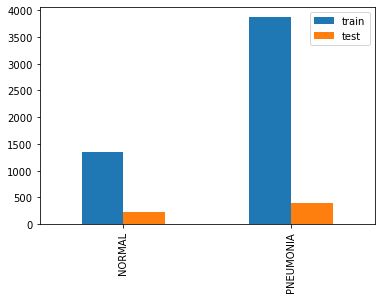

In [549]:
# Imágenes de cada clase, por train/test

_, train_counts = np.unique(y_train, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)

pd.DataFrame({'train': train_counts,
             'test': test_counts},
            index=label_names).plot.bar();

plt.savefig('images/number_samples.png', dpi=400, bbox_inches="tight");

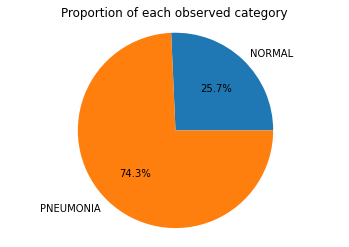

In [33]:
# Tenemos muchas imágenes de neumonía

plt.pie(train_counts,
        explode=(0, 0) , 
        labels=label_names,
        autopct='%1.1f%%')

plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [328]:
# Leyendo imágenes de validación 

from skimage.io import imread
import cv2


def read_data(path, category):
    X = []
    Y = []
    
    for file in os.listdir(path):
        
        image = cv2.imread(path + file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, IMAGE_SIZE)
        
        X.append(image)
        
    for file in os.listdir(path):
        
        Y.append(label_names_[category])
    
    return np.array(X), np.array(Y)


X_val1, y_val1 = read_data(VAL_NORMAL, 'NORMAL')
X_val2, y_val2 = read_data(VAL_SICK, 'PNEUMONIA')

print(X_val1.shape)
print(y_val1.shape)
print(X_val2.shape)
print(y_val2.shape)

# Juntamos los arrays

X_val = [X_val1, X_val2]
X_val = np.concatenate(X_val)

y_val = [y_val1, y_val2]
y_val = np.concatenate(y_val)

print("Shape final 'X_val':", X_val.shape)
print("Shape final 'y_val':", y_val.shape)

(8, 128, 128, 3)
(8,)
(8, 128, 128, 3)
(8,)
Shape final 'X_val': (16, 128, 128, 3)
Shape final 'y_val': (16,)


In [329]:
# Normalizando datos

X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

In [330]:
# Visualización de imágenes

def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + label_names[labels[index]])
    plt.show()

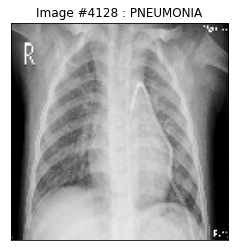

In [331]:
display_random_image(label_names, X_train, y_train)

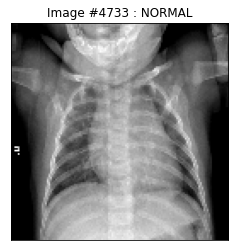

In [354]:
display_random_image(label_names, X_train, y_train)

In [531]:
# Función para mostrar 25 imágenes

def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[0+i], cmap=plt.cm.binary)
        plt.xlabel(label_names[labels[0+i]])
    plt.show()

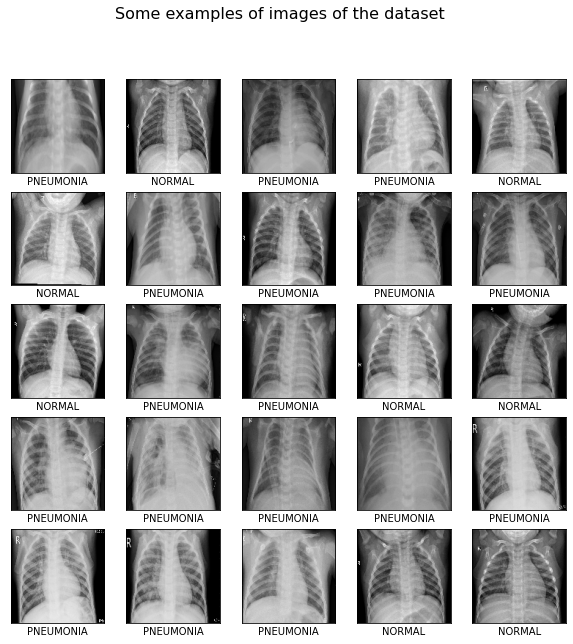

In [356]:
display_examples(label_names, X_train, y_train)

# Aquí muestro imágenes de '255' en adelante:

# plt.imshow(images[255+i], cmap=plt.cm.binary)
# plt.xlabel(label_names[labels[255+i]])

### Modelo

In [260]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator, load_img


In [290]:
layers = [
    
    # First layer
    keras.layers.Conv2D(64,       
                        (3,3), 
                        activation = 'relu', 
                        input_shape = (IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),          
    
    keras.layers.MaxPooling2D(pool_size = (2,2)),    
    
    keras.layers.Conv2D(64,
                       (3,3),
                       activation = 'relu'),          
    
    keras.layers.MaxPooling2D(pool_size = (2,2)),    
    
    # Fully connected layer
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    
    # Output layer (el resultado es binario: NORMAL or PNEUMONIA)
    keras.layers.Dense(1, activation = 'sigmoid')
    
]


model = keras.Sequential(layers)

model.compile(optimizer = 'adam',
             loss= 'binary_crossentropy',  # porque tenemos un binario
             metrics = ['accuracy'])


In [291]:
history = model.fit(X_train,
                   y_train,
                   epochs=15,
                   validation_split=0.2)

Epoch 1/15
131/131 [==============================] - 5s 39ms/step - loss: 0.3650 - accuracy: 0.8365 - val_loss: 0.1625 - val_accuracy: 0.9377
Epoch 2/15
131/131 [==============================] - 5s 38ms/step - loss: 0.1638 - accuracy: 0.9360 - val_loss: 0.1261 - val_accuracy: 0.9550
Epoch 3/15
131/131 [==============================] - 6s 44ms/step - loss: 0.1259 - accuracy: 0.9518 - val_loss: 0.1312 - val_accuracy: 0.9473
Epoch 4/15
131/131 [==============================] - 5s 39ms/step - loss: 0.1118 - accuracy: 0.9566 - val_loss: 0.0970 - val_accuracy: 0.9655
Epoch 5/15
131/131 [==============================] - 4s 32ms/step - loss: 0.0932 - accuracy: 0.9664 - val_loss: 0.0864 - val_accuracy: 0.9674
Epoch 6/15
131/131 [==============================] - 4s 34ms/step - loss: 0.0887 - accuracy: 0.9691 - val_loss: 0.1008 - val_accuracy: 0.9617
Epoch 7/15
131/131 [==============================] - 4s 33ms/step - loss: 0.0793 - accuracy: 0.9715 - val_loss: 0.1035 - val_accuracy: 0.9617

In [292]:
# Evaluación del modelo 

test_loss = model.evaluate(X_test, y_test)

# No está nada mal el 'accuracy'

20/20 [==============================] - 0s 9ms/step - loss: 0.9214 - accuracy: 0.7917


In [293]:
# Predicciones

# En clasificación binaria SIEMPRE muestra la probabilidad de ser '1': NEUMONÍA

predictions = model.predict(X_test[:1]).round(3)
print("shape", predictions.shape)

predictions

# 100% de probabilidad que sea neumonía

shape (1, 1)


array([[1.]], dtype=float32)

In [294]:
predictions = model.predict(X_test[253:254]).round(3)
print("shape", predictions.shape)

predictions

# 100% de probabilidad que sea neumonía

shape (1, 1)


array([[1.]], dtype=float32)

In [295]:
# Predicciones del modelo con 'X_test'

predictions_model = model.predict(X_test)
predictions_model.round(3)

array([[1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [0.997],
       [0.974],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [0.996],
       [1.   ],
       [1.   ],
       [1.   ],
       [0.999],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [0.999],
       [1.   ],
       [0.999],
       [1.   ],
       [1.   ],
       [1.   ],
       [0.974],
       [1.   ],
       [1.   ],
       [0.999],
       [1.   ],
       [1.   ],
       [1.   ],
       [0.992],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [0.804],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [0.971],
       [1.   ],
       [0.884],
       [

In [267]:
predictions_model.shape

(624, 1)

In [296]:
predictions_model[0]

array([1.], dtype=float32)

In [297]:
# Voy a sacar todos los valores de las predicciones y guardarlos en una lista

preds = []

for i in range(len(predictions_model)):
    preds.append(predictions_model[i].round(3))
    
preds

[array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.997], dtype=float32),
 array([0.974], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.996], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.999], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([0.999], dtype=float32),
 array([1.], dtype=float32),
 array([0.999], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float3

In [414]:
# Creo un dataframe con 'y_test' y las predicciones
df_pred = pd.DataFrame({'y_test' : y_test, 'Predictions' : preds})

df_pred

,y_test,Predictions
0,1,[1.0]
1,1,[1.0]
2,1,[1.0]
3,1,[1.0]
4,1,[1.0]
...,...,...
619,0,[0.011]
620,0,[1.0]
621,0,[0.999]
622,0,[1.0]


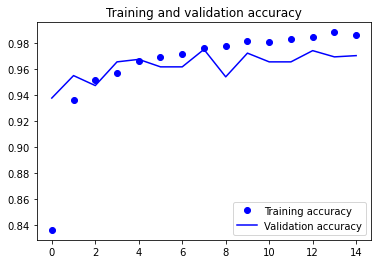

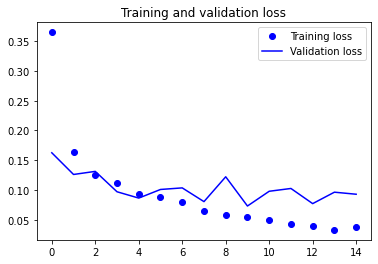

In [299]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [302]:
# Voy a guardar el modelo en un pickle

model.save('1st_Xray_model.h5')

loaded_model = keras.models.load_model('1st_Xray_model.h5')

result = loaded_model.evaluate(X_test, y_test)
print(result)

20/20 [==============================] - 0s 8ms/step - loss: 0.9214 - accuracy: 0.7917
[0.9213914275169373, 0.7916666865348816]


-----

--------

--------

In [ ]:
# Otro modelo con más capas

In [ ]:
from keras.models import Sequential
from keras.layers import LeakyReLU
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten  

new_model = Sequential()
new_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(32,32,3),padding='same'))
new_model.add(LeakyReLU(alpha=0.1))
new_model.add(MaxPooling2D((2, 2),padding='same'))
new_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
new_model.add(LeakyReLU(alpha=0.1))
new_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
new_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
new_model.add(LeakyReLU(alpha=0.1))                  
new_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
new_model.add(Flatten())
new_model.add(Dense(128, activation='linear'))
new_model.add(LeakyReLU(alpha=0.1))                  
new_model.add(Dense(1, activation='softmax'))

new_model.compile(loss=keras.losses.binary_crossentropy, 
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])



In [276]:
history = new_model.fit(X_train, y_train, 
                        batch_size=20,
                        epochs=10,
                        validation_split = .2)
                        #validation_data=(X_val, y_val))


Epoch 1/10
209/209 [==============================] - 7s 33ms/step - loss: 3.9256 - accuracy: 0.7426 - val_loss: 3.8999 - val_accuracy: 0.7443
Epoch 2/10
209/209 [==============================] - 7s 33ms/step - loss: 3.9256 - accuracy: 0.7426 - val_loss: 3.8999 - val_accuracy: 0.7443
Epoch 3/10
209/209 [==============================] - 7s 35ms/step - loss: 3.9256 - accuracy: 0.7426 - val_loss: 3.8999 - val_accuracy: 0.7443
Epoch 4/10
209/209 [==============================] - 9s 42ms/step - loss: 3.9256 - accuracy: 0.7426 - val_loss: 3.8999 - val_accuracy: 0.7443
Epoch 5/10
209/209 [==============================] - 7s 34ms/step - loss: 3.9256 - accuracy: 0.7426 - val_loss: 3.8999 - val_accuracy: 0.7443
Epoch 6/10
209/209 [==============================] - 6s 31ms/step - loss: 3.9256 - accuracy: 0.7426 - val_loss: 3.8999 - val_accuracy: 0.7443
Epoch 7/10
209/209 [==============================] - 7s 31ms/step - loss: 3.9256 - accuracy: 0.7426 - val_loss: 3.8999 - val_accuracy: 0.7443

In [277]:
# Evaluación

test_eval = new_model.evaluate(X_test, y_test)

# El accuracy no mejora al anterior modelo


20/20 [==============================] - 0s 12ms/step - loss: 5.7185 - accuracy: 0.6250


----

----

----

In [278]:
# Otro modelo

In [280]:
model_ = Sequential()

model_.add(Conv2D(input_shape=(32,32,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model_.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model_.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model_.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model_.add(Flatten())
model_.add(Dense(units=4096,activation="relu"))
model_.add(Dense(units=4096,activation="relu"))
model_.add(Dense(units=5, activation="softmax"))


# Compilo
model_.compile(optimizer = 'adam',
             loss= 'binary_crossentropy',  
             metrics = ['accuracy'])



In [ ]:
history2 = model_.fit(X_train,
         y_train,
         epochs = 10,
         batch_size = 20,   
         validation_split = .2)

In [ ]:
# Este modelo en 'kaggle notebooks' se queda en accuracy de 62,5%

## Otros modelos

In [307]:
# VGG16

from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Activation, Flatten, Dropout, Reshape, GlobalAveragePooling2D


expert_conv = VGG16(weights = 'imagenet', include_top = False,input_shape=(32,32,3))

for layer in expert_conv.layers:
      trainable = True
      layer.trainable = trainable

expert_model = Sequential()
expert_model.add(Reshape((32,32,3)))
expert_model.add(expert_conv)
expert_model.add(GlobalAveragePooling2D())

expert_model.add(Dense(128, activation = 'relu'))
expert_model.add(Dropout(0.3))
expert_model.add(Dense(4096, activation = 'relu'))
expert_model.add(Dense(1, activation = "sigmoid"))

opt = keras.optimizers.SGD(lr=1e-4, momentum=0.95)

expert_model.compile(loss = "binary_crossentropy", optimizer = opt, metrics=['accuracy'])



In [308]:
history3 = expert_model.fit(X_train,
                           y_train,
                           validation_split = .2,
                           epochs = 8)

Epoch 1/8
131/131 [==============================] - 171s 1s/step - loss: 0.5259 - accuracy: 0.7220 - val_loss: 0.3247 - val_accuracy: 0.7653
Epoch 2/8
131/131 [==============================] - 173s 1s/step - loss: 0.2302 - accuracy: 0.9070 - val_loss: 0.1303 - val_accuracy: 0.9521
Epoch 3/8
131/131 [==============================] - 172s 1s/step - loss: 0.1430 - accuracy: 0.9473 - val_loss: 0.1268 - val_accuracy: 0.9473
Epoch 4/8
131/131 [==============================] - 175s 1s/step - loss: 0.1101 - accuracy: 0.9590 - val_loss: 0.0880 - val_accuracy: 0.9684
Epoch 5/8
131/131 [==============================] - 171s 1s/step - loss: 0.0829 - accuracy: 0.9700 - val_loss: 0.0730 - val_accuracy: 0.9761
Epoch 6/8
131/131 [==============================] - 176s 1s/step - loss: 0.0852 - accuracy: 0.9703 - val_loss: 0.0864 - val_accuracy: 0.9732
Epoch 7/8
131/131 [==============================] - 165s 1s/step - loss: 0.0710 - accuracy: 0.9729 - val_loss: 0.0963 - val_accuracy: 0.9674
Epoch 

In [ ]:
# Este modelo funciona bien, en 'kaggle notebooks' hasta 87.5% accuracy conseguí
# en kaggle 128x128 imágenes

# 20/20 [==============================] - 1s 28ms/step - loss: 0.4040 - accuracy: 0.8750


In [310]:
# Evaluación 32x32

test_eval = expert_model.evaluate(X_test, y_test)

20/20 [==============================] - 3s 128ms/step - loss: 0.6514 - accuracy: 0.8558


In [321]:
# Evaluación de 'validation' 32x32

test_eval = expert_model.evaluate(X_val, y_val)

1/1 [==============================] - 0s 878us/step - loss: 0.0771 - accuracy: 0.9375


In [311]:
# Voy a guardar el modelo en un pickle

expert_model.save('2nd_Xray_model.h5')


----------

----------

## Bests models

In [314]:
#### OJO ####

# en kaggle 128x128 imágenes

# 20/20 [==============================] - 0s 22ms/step - loss: 0.2817 - accuracy: 0.8990


expert_conv = VGG16(weights = 'imagenet', include_top = False,input_shape=(32,32,3))

for layer in expert_conv.layers:
      trainable = True
      layer.trainable = trainable

expert_model1 = Sequential()
expert_model1.add(Reshape((32,32,3)))
expert_model1.add(expert_conv)
expert_model1.add(GlobalAveragePooling2D())

expert_model1.add(Dense(128, activation = 'relu'))
expert_model1.add(Dropout(0.3))
expert_model1.add(Dense(4096, activation = 'relu'))
expert_model1.add(Dense(1, activation = "sigmoid"))

opt = keras.optimizers.SGD(lr=1e-4, momentum=0.8)

expert_model1.compile(loss = "binary_crossentropy", optimizer = opt, metrics=['accuracy'])

In [ ]:
history4 = expert_model1.fit(X_train,
                           y_train,
                           validation_split = .2,
                           epochs = 8)

In [360]:
# Cargando modelo descargado de kaggle ya entrenado

# Ojo porque está entrenado con imágenes 128x128

kaggle_model = keras.models.load_model('kaggle_Xray_model.h5')

result = kaggle_model.evaluate(X_test, y_test)

20/20 [==============================] - 44s 2s/step - loss: 0.2817 - accuracy: 0.8990


In [361]:
# Evaluación de 'validation' 128x128

test_eval = kaggle_model.evaluate(X_val, y_val)


# curiosamente con 'validation' este modelo que tiene mejor accuracy da peor resultado que el de 85,5%

1/1 [==============================] - 0s 1ms/step - loss: 0.2896 - accuracy: 0.8125


----------

----------

----------

In [365]:
# Cargo datos de modelo de kaggle con 89,10% accuracy

kaggle_model1 = keras.models.load_model('3rd_Xray_model.h5')

result = kaggle_model1.evaluate(X_test, y_test)

20/20 [==============================] - 46s 2s/step - loss: 0.2904 - accuracy: 0.8910


In [366]:
# Evaluación de 'validation' 128x128

test_eval = kaggle_model1.evaluate(X_val, y_val)


# Este modelo GENERALIZA bastante bien

1/1 [==============================] - 0s 936us/step - loss: 0.2822 - accuracy: 0.8750


In [395]:
import json

# Opening JSON file 
file = open('history3.json',) 
  
history_kaggle_model1_json = json.load(file) 

history_kaggle_model1 = pd.DataFrame(history_kaggle_model1_json)
history_kaggle_model1

,loss,accuracy,val_loss,val_accuracy
0,0.620658,0.725072,0.560183,0.765326
1,0.572776,0.737296,0.529459,0.765326
2,0.547244,0.737296,0.493189,0.765326
3,0.491626,0.737296,0.396668,0.765326
4,0.359853,0.742809,0.286047,0.881226
5,0.271499,0.884947,0.199935,0.938697
6,0.200749,0.930968,0.136169,0.950192
7,0.161468,0.941994,0.215147,0.895594


In [379]:
# Para plotear directamente cuando se tiene el modelo y su '.history'

def plot_acc(history, ax = None, xlabel = 'Epoch #'):
    history = history.history
    history.update({'epoch':list(range(len(history['val_accuracy'])))})
    history = pd.DataFrame.from_dict(history)
    best_epoch = history.sort_values(by = 'val_accuracy', \
                                     ascending = False).iloc[0]['epoch']
    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
    ax.axhline(0.5, linestyle = '--',color='red', label = 'Chance')
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')  
    ax.legend(loc = 1)    
    ax.set_ylim([0.4, 1])
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Accuracy (Fraction)')
    plt.show()
    print("The highest validation accuracy was",history.sort_values\
          (by = 'val_accuracy', ascending = False).iloc[0]['val_accuracy'])
    print("The lowest validation accuracy was",history.sort_values\
          (by = 'val_accuracy', ascending = True).iloc[0]['val_accuracy'])
    
    
def plot_loss(history, ax = None, xlabel = 'Epoch #'):
    history = history.history
    history.update({'epoch':list(range(len(history['val_loss'])))})
    history = pd.DataFrame.from_dict(history)
    best_epoch = history.sort_values(by = 'val_loss', ascending = True).iloc[0]['epoch']
    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_loss', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'loss', data = history, label = 'Training', ax = ax)
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')  
    ax.legend(loc = 1)    
    ax.set_ylim([0.1, 1])
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Loss (Fraction)')
    plt.show()
    print("The lowest validation loss was",history.sort_values\
          (by = 'val_loss', ascending = True).iloc[0]['val_loss'])
    print("The highest validation loss was",history.sort_values\
          (by = 'val_loss', ascending = False).iloc[0]['val_loss'])

In [852]:
# Para plotear cuando se carga el history del modelo de un json (diccionario) y hacemos un dataframe

def plot_acc(history, ax = None, xlabel = 'Epoch #'):
    #history = history.history
    history['epoch'] = list(range(len(history['val_accuracy'])))
    #history = pd.DataFrame.from_dict(history)
    best_epoch = history.sort_values(by = 'val_accuracy', \
                                     ascending = False).iloc[0]['epoch']
    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
    #ax.axhline(0.5, linestyle = '--',color='red', label = 'Chance')
    #ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')  
    ax.legend(loc = 'best')    
    ax.set_ylim([0.4, 1])
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Accuracy (Fraction)')
    plt.show()
    print("The highest validation accuracy was",history.sort_values\
          (by = 'val_accuracy', ascending = False).iloc[0]['val_accuracy'])
    print("The lowest validation accuracy was",history.sort_values\
          (by = 'val_accuracy', ascending = True).iloc[0]['val_accuracy'])    
    
def plot_loss(history, ax = None, xlabel = 'Epoch #'):
    #history = history.history
    history['epoch'] = list(range(len(history['val_loss'])))
    #history = pd.DataFrame.from_dict(history)
    best_epoch = history.sort_values(by = 'val_loss', ascending = True).iloc[0]['epoch']
    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_loss', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'loss', data = history, label = 'Training', ax = ax)
    #ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')  
    ax.legend(loc = 'best')    
    ax.set_ylim([0.1, 1])
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Loss (Fraction)')
    plt.show()
    print("The lowest validation loss was",history.sort_values\
          (by = 'val_loss', ascending = True).iloc[0]['val_loss'])
    print("The highest validation loss was",history.sort_values\
          (by = 'val_loss', ascending = False).iloc[0]['val_loss'])

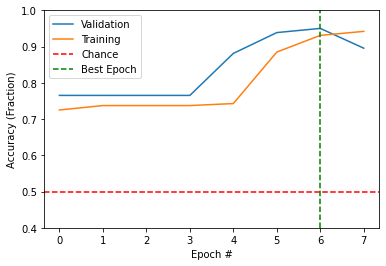

The highest validation accuracy was 0.9501915574
The lowest validation accuracy was 0.7653256655


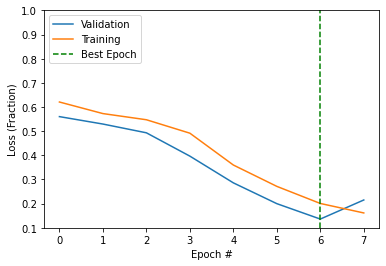

The lowest validation loss was 0.1361693591
The highest validation loss was 0.5601825714


In [392]:
plot_acc(history_kaggle_model1)
plot_loss(history_kaggle_model1)

-----

-----

-----

-----

In [393]:
# Cargo datos de modelo de kaggle con 89,74% accuracy

kaggle_model2 = keras.models.load_model('4th_Xray_model.h5')

result = kaggle_model2.evaluate(X_test, y_test)

20/20 [==============================] - 49s 2s/step - loss: 0.3478 - accuracy: 0.8974


In [404]:
# Evaluación de 'validation' 128x128

test_eval = kaggle_model2.evaluate(X_val, y_val)

# GENERALIZA genial con validación

1/1 [==============================] - 0s 3ms/step - loss: 0.1516 - accuracy: 0.9375


In [397]:
# Opening JSON file 

file2 = open('history4.json',) 
  
history_kaggle_model2_json = json.load(file2) 

history_kaggle_model2 = pd.DataFrame(history_kaggle_model2_json)
history_kaggle_model2

,loss,accuracy,val_loss,val_accuracy
0,0.610340,0.691515,0.529497,0.765326
1,0.523454,0.737296,0.421415,0.765326
2,0.333033,0.812081,0.197431,0.928161
3,0.206014,0.917306,0.155731,0.931035
4,0.140575,0.950863,0.269607,0.879310
5,0.134558,0.946069,0.105262,0.957854
6,0.094628,0.965964,0.059092,0.977969
7,0.089809,0.969080,0.092615,0.964559


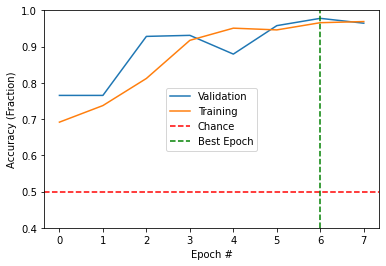

The highest validation accuracy was 0.9779693484
The lowest validation accuracy was 0.7653256655


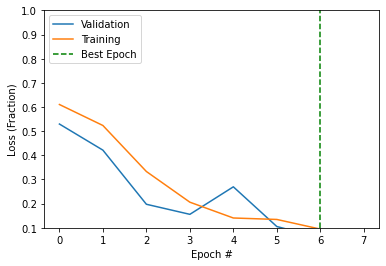

The lowest validation loss was 0.0590915233
The highest validation loss was 0.5294974446


In [398]:
plot_acc(history_kaggle_model2)
plot_loss(history_kaggle_model2)

-----

-----

-----

-----

In [ ]:
# Cargo datos de modelo de kaggle con 91,19% accuracy


# Arquitectura

expert_conv = VGG16(weights = 'imagenet', include_top = False,input_shape=(128,128,3))

for layer in expert_conv.layers:
      trainable = True
      layer.trainable = trainable

tweaked_model = Sequential()
tweaked_model.add(Reshape((128,128,3)))
tweaked_model.add(expert_conv)
tweaked_model.add(GlobalAveragePooling2D())

tweaked_model.add(Dense(128, activation = 'relu'))
tweaked_model.add(Dropout(0.3))
tweaked_model.add(Dense(4096, activation = 'relu'))
tweaked_model.add(Dense(1, activation = "sigmoid"))

opt = keras.optimizers.SGD(lr=1e-4, momentum=0.9)

tweaked_model.compile(loss = "binary_crossentropy", optimizer = opt, metrics=['accuracy'])

history_ = tweaked_model.fit(X_train,
                           y_train,
                           validation_split = .2,
                           epochs = 8)


In [403]:
kaggle_model3 = keras.models.load_model('5th_Xray_model.h5')

result = kaggle_model3.evaluate(X_test, y_test)

20/20 [==============================] - 56s 3s/step - loss: 0.2733 - accuracy: 0.9119


In [405]:
# Evaluación de 'validation' 128x128

test_eval = kaggle_model3.evaluate(X_val, y_val)

# GENERALIZA perfecto con validación

1/1 [==============================] - 0s 945us/step - loss: 0.0603 - accuracy: 1.0000


In [401]:
# Cuando tenemos un modelo podemos guardar su 'history' para luego poder usarla 

# convert the history.history dict to a pandas DataFrame:     

# hist_tweaked = pd.DataFrame(history_.history) 
# hist_tweaked

# # save to json:  
# hist_json_file = 'history5.json' 
# with open(hist_json_file, mode='w') as f:
#     hist_tweaked.to_json(f)


# Opening JSON file 

file3 = open('history5.json',) 
  
history_kaggle_model3_json = json.load(file3) 

history_kaggle_model3 = pd.DataFrame(history_kaggle_model3_json)
history_kaggle_model3

,loss,accuracy,val_loss,val_accuracy
0,0.605891,0.701822,0.529292,0.765326
1,0.512106,0.737296,0.401855,0.765326
2,0.321279,0.817114,0.230165,0.908046
3,0.186552,0.931927,0.116098,0.954981
4,0.130511,0.952780,0.077454,0.970307
5,0.143973,0.945350,0.085457,0.968391
6,0.087287,0.969799,0.119955,0.952107
7,0.092588,0.964525,0.133461,0.946360


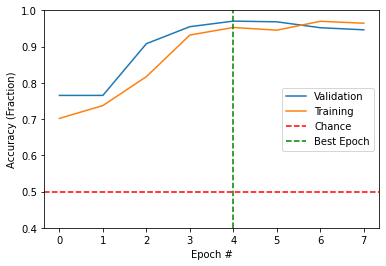

The highest validation accuracy was 0.9703065157
The lowest validation accuracy was 0.7653256655


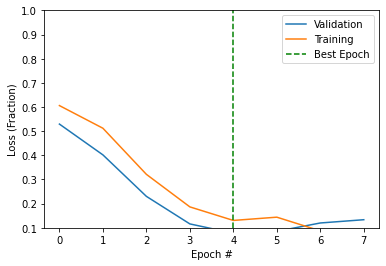

The lowest validation loss was 0.0774538964
The highest validation loss was 0.529292047


In [474]:
plot_acc(history_kaggle_model3)
plot_loss(history_kaggle_model3)

In [410]:
predictions = kaggle_model3.predict(X_test).round(3)

# Voy a sacar todos los valores de las predicciones y guardarlos en una lista

preds1 = []

for i in range(len(predictions)):
    preds1.append(predictions[i].round(3))
    
df_predictions = pd.DataFrame({'y_test' : y_test, 'Predictions' : preds1})

df_predictions

,y_test,Predictions
0,1,[0.999]
1,1,[0.999]
2,1,[1.0]
3,1,[1.0]
4,1,[0.991]
...,...,...
619,0,[0.023]
620,0,[0.274]
621,0,[0.139]
622,0,[0.956]


In [416]:
# Voy a pasar los valores de preds1 a 0 y 1 para poder representarlos en confusion_matrix

df_predictions['preds_for_cm'] = np.where(df_predictions['Predictions'] > 0.5, 1, 0)

df_predictions

,y_test,Predictions,preds_for_cm
0,1,[0.999],1
1,1,[0.999],1
2,1,[1.0],1
3,1,[1.0],1
4,1,[0.991],1
...,...,...,...
619,0,[0.023],0
620,0,[0.274],0
621,0,[0.139],0
622,0,[0.956],1


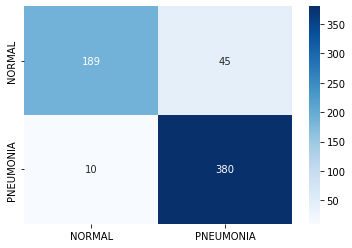

In [463]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, df_predictions['preds_for_cm'])

sns.heatmap(CM,
           annot=True,
            annot_kws={"size":10},
            cmap="Blues",
           xticklabels=label_names,
           yticklabels=label_names,
            fmt = 'd');   # Esto le da el formato correcto al número a mostrar en el heatmap

plt.yticks(va = 'center');

#plt.savefig('model_confusion_matrix.png', dpi=400, bbox_inches="tight");

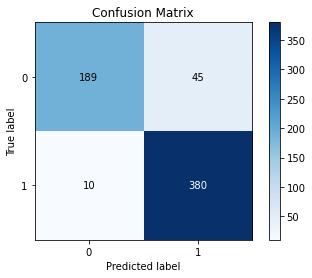

In [449]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, df_predictions['preds_for_cm']);

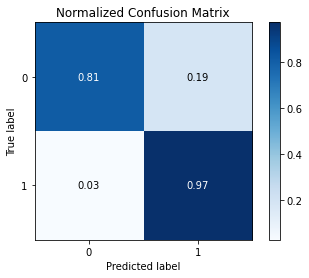

In [464]:
skplt.metrics.plot_confusion_matrix(y_test, df_predictions['preds_for_cm'], normalize = True);
#plt.savefig('model_confusion_matrix_normalized.png', dpi=400, bbox_inches="tight");

In [550]:
# Calculate Precision and Recall
tn, fp, fn, tp = CM.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))


Recall of the model is 0.97
Precision of the model is 0.89


In [525]:
preds_labels1 = np.where(predictions > 0.5, 1, 0).reshape(-1,)
print(preds_labels1.shape)
print(type(preds_labels1))
preds_labels1

(624,)
<class 'numpy.ndarray'>


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [526]:
# Con el 'argmax()' me está arrojando resultados erróneos, todo como '0'

preds_labels2 = np.argmax(predictions, axis=1)
print(preds_labels2.shape)
print(type(preds_labels2))
preds_labels2

(624,)
<class 'numpy.ndarray'>


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

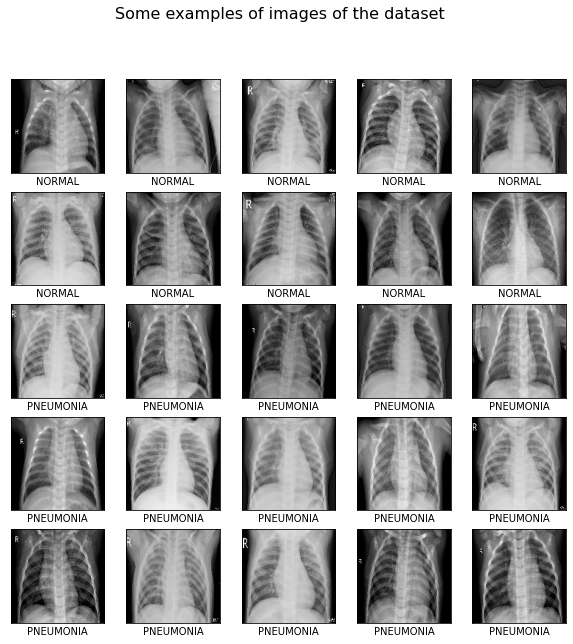

In [548]:

#preds_labels1 = np.where(predictions > 0.5, 1, 0).reshape(-1,)
#preds_labels2 = np.argmax(predictions, axis=1)

def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    
    mask = test_labels == pred_labels
    mislabeled_index = np.where(mask == False)
    mislabeled_images = test_images[mislabeled_index]
    mislabeled_labels = pred_labels[mislabeled_index]
    
    display_examples(class_names, mislabeled_images, mislabeled_labels)
    
print_mislabeled_images(label_names, X_test, y_test, preds_labels1)
    
    
# Principalmente me clasifica radiografías normales como neumonía (45)
# Sin embargo, sólo me clasifica 10 radiografías como normales cuando SÍ tienen neumonía, que es lo que me interesa

# Me interesa minimizar el número de errores en clasificar neumonía como normal (False Negative)

In [ ]:
## ¿Puedo sacar ese EPOCH 4 , best epoch? 

# Probado en kaggle, sus pesos no me ofrecen mejores predicciones luego

## Datagen model

In [ ]:
'''

Me percaté entrenando al modelo anterior que sus resultados de una ejecución a otra eran dispares.
- Oscilando entre 70 - 91% accuracy
- Jugué con todos los parámetros y su comportamiento era igual

¿Problema?
La diferencia en el número de imágenes clasificadas con neumonía y las que no

¿Solución?
Crear imágenes sintéticas a partir de las que tengo

'''

In [551]:
# Arquitectura

datagen = ImageDataGenerator(
        featurewise_center=False,  # establece la media del dataset a 0
        samplewise_center=False,  # media de cada entrada a 0
        featurewise_std_normalization=False,  # divide cada input por la std del dataset
        samplewise_std_normalization=False,  # divide cada entrada por su std
        zca_whitening=False,  # específico para imágenes y gestión de sus colores
        rotation_range = 30,  
        zoom_range = 0.2,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip = True,  
        vertical_flip=False) 

validation_datagen = ImageDataGenerator()

datagen.fit(X_train)


# Defino el mismo modelo que me viene funcionando bien

expert_conv = VGG16(weights = 'imagenet', include_top = False,input_shape=(128,128,3))

for layer in expert_conv.layers:
      trainable = True
      layer.trainable = trainable

tweaked_model = Sequential()
tweaked_model.add(Reshape((128,128,3)))
tweaked_model.add(expert_conv)
tweaked_model.add(GlobalAveragePooling2D())

tweaked_model.add(Dense(128, activation = 'relu'))
tweaked_model.add(Dropout(0.3))
tweaked_model.add(Dense(4096, activation = 'relu'))
tweaked_model.add(Dense(1, activation = "sigmoid"))

opt = keras.optimizers.SGD(lr=1e-4, momentum=0.8)

tweaked_model.compile(loss = "binary_crossentropy", optimizer = opt, metrics=['accuracy'])

history = tweaked_model.fit(datagen.flow(X_train,y_train, batch_size = 32) ,epochs = 25, 
                           validation_data = validation_datagen.flow(X_val, y_val))

# Entrenado en kaggle, 20 minutos de ejecución
# Tras numerosas ejecuciones observo que su comportamiento es estable en ejecuciones, siempre con 'accuracy' 88-93%

In [553]:
# Cargo el modelo

datagen_model = keras.models.load_model('datagen_Xray_model.h5')

result = datagen_model.evaluate(X_test, y_test)

20/20 [==============================] - 54s 3s/step - loss: 0.2236 - accuracy: 0.9311


In [554]:
# Opening JSON file 

datagen_file = open('history_datagen.json',) 
  
history_datagen_json = json.load(datagen_file) 

history_datagen = pd.DataFrame(history_datagen_json)
history_datagen

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.617215,0.733896,0.765204,0.5000,0
1,0.561490,0.742906,0.804482,0.5000,1
2,0.526021,0.742906,0.804358,0.5000,2
3,0.426303,0.743098,0.767880,0.5000,3
4,0.306215,0.841258,0.883826,0.6250,4
5,0.262498,0.887462,0.518844,0.7500,5
6,0.232455,0.897814,0.962920,0.6250,6
7,0.220022,0.907975,0.511338,0.7500,7
8,0.211971,0.915261,0.381537,0.8125,8
9,0.197985,0.920821,0.483313,0.7500,9


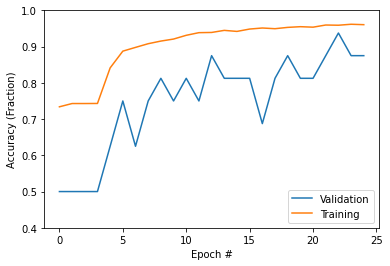

The highest validation accuracy was 0.9375
The lowest validation accuracy was 0.5


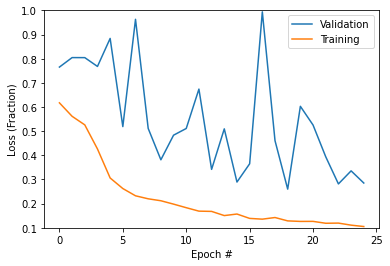

The lowest validation loss was 0.2600966096
The highest validation loss was 0.9938626885


In [853]:
plot_acc(history_datagen)
plot_loss(history_datagen)

In [558]:
predictions = datagen_model.predict(X_test).round(3)

# Voy a sacar todos los valores de las predicciones y guardarlos en una lista

preds1 = []

for i in range(len(predictions)):
    preds1.append(predictions[i].round(3))
    
df_predictions = pd.DataFrame({'y_test' : y_test, 'Predictions' : preds1})

df_predictions

,y_test,Predictions
0,1,[0.999]
1,1,[0.999]
2,1,[0.997]
3,1,[1.0]
4,1,[0.99]
...,...,...
619,0,[0.016]
620,0,[0.161]
621,0,[0.152]
622,0,[0.983]


In [559]:
# Voy a pasar los valores de preds1 a 0 y 1 para poder representarlos en confusion_matrix

df_predictions['preds_for_cm'] = np.where(df_predictions['Predictions'] > 0.5, 1, 0)

df_predictions

,y_test,Predictions,preds_for_cm
0,1,[0.999],1
1,1,[0.999],1
2,1,[0.997],1
3,1,[1.0],1
4,1,[0.99],1
...,...,...,...
619,0,[0.016],0
620,0,[0.161],0
621,0,[0.152],0
622,0,[0.983],1


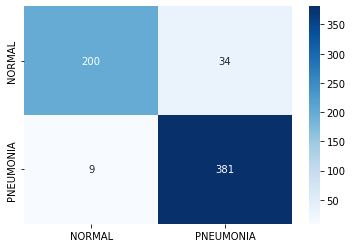

In [857]:
CM = confusion_matrix(y_test, df_predictions['preds_for_cm'])

sns.heatmap(CM,
           annot=True,
            annot_kws={"size":10},
            cmap="Blues",
           xticklabels=label_names,
           yticklabels=label_names,
            fmt = 'd');   # Esto le da el formato correcto al número a mostrar en el heatmap

plt.yticks(va = 'center');

#plt.savefig('model_confusion_matrix.png', dpi=400, bbox_inches="tight");

# Los resultados son mejores que el modelo anterior sin 'ImageDataGenerator'

# me interesa que minimice los False Negative: lo reduce en 1
# también minimiza False Positive: los reduce en 11


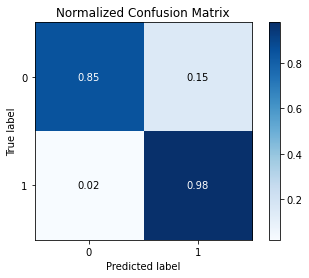

In [858]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, df_predictions['preds_for_cm'], normalize = True);

#plt.savefig('model_confusion_matrix_normalized.png', dpi=400, bbox_inches="tight");

In [562]:
# Calculate Precision and Recall
tn, fp, fn, tp = CM.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))

Recall of the model is 0.98
Precision of the model is 0.92


----

In [814]:
# ¿Dónde me está cometiendo esos 9 errores? ¿Qué probabilidad les está otorgando el modelo a esos errores?

df_predictions['Acierto'] = np.where(df_predictions['y_test'] == df_predictions['preds_for_cm'], True, False)

# Filtro por aquellos valores que han sido catalogados como 0 y su acierto es 'False'

df_predictions[(df_predictions['Acierto'] == False) & (df_predictions['preds_for_cm'] == 0)]

,y_test,Predictions,preds_for_cm,Acierto
42,1,[0.397],0,False
47,1,[0.275],0,False
61,1,[0.289],0,False
118,1,[0.021],0,False
204,1,[0.412],0,False
251,1,[0.444],0,False
294,1,[0.094],0,False
308,1,[0.193],0,False
348,1,[0.137],0,False


In [ ]:
'''

Veo que está difícil minimizar estos errores porque están en probabilidades bajas.

Voy a ver qué puedo hacer con el 'treshold'

'''

-----

-----

Threshold 0.1
Recall of the model is 0.99
Precision of the model is 0.83

#######

Threshold 0.2
Recall of the model is 0.99
Precision of the model is 0.86

#######

Threshold 0.30000000000000004
Recall of the model is 0.98
Precision of the model is 0.90

#######

Threshold 0.4
Recall of the model is 0.98
Precision of the model is 0.91

#######

Threshold 0.5
Recall of the model is 0.98
Precision of the model is 0.92

#######

Threshold 0.6
Recall of the model is 0.97
Precision of the model is 0.92

#######

Threshold 0.7000000000000001
Recall of the model is 0.96
Precision of the model is 0.92

#######

Threshold 0.8
Recall of the model is 0.95
Precision of the model is 0.93

#######

Threshold 0.9
Recall of the model is 0.94
Precision of the model is 0.95

#######



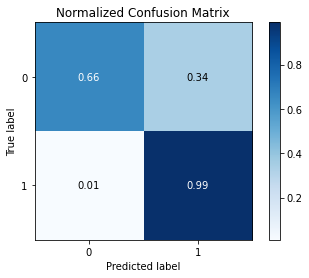

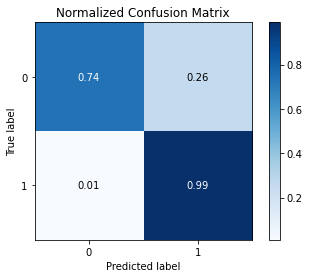

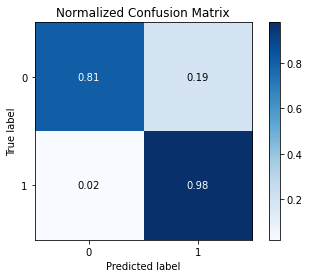

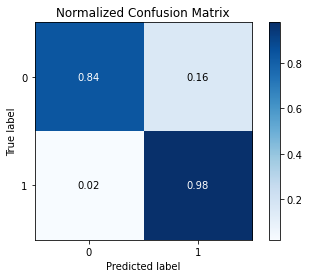

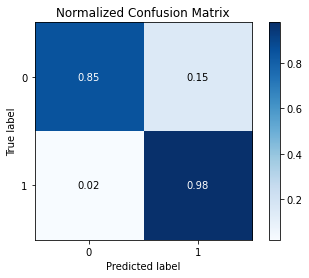

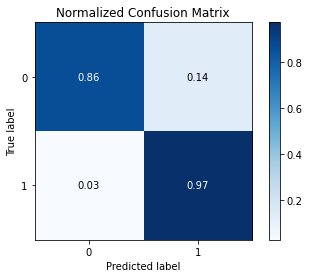

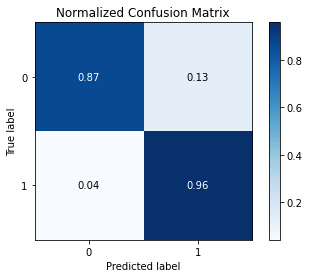

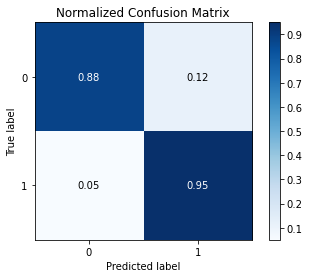

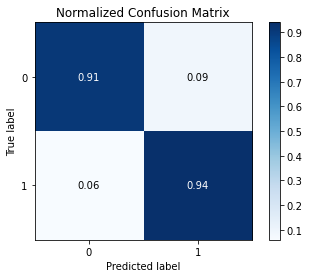

In [577]:
# Voy a probar a mover el 'threshold' para ver cómo se comporta el Recall() y con cuál obtengo el mejor resultado

# quiero minimizar los 'False Negative' y me permito ser más laxo en los 'False Positive'

# En el modelo estoy tomando por defecto el 0.5

df_predictions1 = pd.DataFrame({'y_test' : y_test, 'Predictions' : preds1})

for threshold in np.arange(0.1, 1, 0.1):
    
    df_predictions1[str(threshold)] = np.where(df_predictions['Predictions'] > threshold, 1, 0)
    CM = confusion_matrix(y_test, df_predictions1[str(threshold)])
    
    tn, fp, fn, tp = CM.ravel()
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print("Threshold %s" % threshold)
    print("Recall of the model is {:.2f}".format(recall))
    print("Precision of the model is {:.2f}".format(precision))
    print("\n#######\n")
    skplt.metrics.plot_confusion_matrix(y_test, df_predictions1[str(threshold)], normalize = True);
    

In [ ]:
# el mejor 'threshold' sería a 0.2, pues tiene 99% en Recall y su precisión es superior al de 0.1

# SIN EMBARGO, clasificar cualquier imagen con probabilidad superior a 0.2 como neumonía es un 'threshold' demasiado alto. 
# Sí es verdad que para mis datos es el mejor, pero de cara a generalizar a futuro no le veo mucho sentido.


In [840]:
# Voy a establecer un filtro para aquellas imágenes que estén en la línea gris de entre 0.35 y 0.65 de probabilidad
# las voy a 'dejar fuera' para que sean revisadas por un especialista (médico) y que mi modelo se centre en las otras

preds_threshold = []
index_threshold = []

for h, pred in enumerate(preds1):
    if pred > 0.35 and pred < 0.65:
        preds_threshold.append(pred)
        index_threshold.append(h)

In [841]:
index_threshold

[42, 59, 204, 251, 333, 395, 455, 489, 507, 513, 598, 610, 616]

In [842]:
print(len(preds_threshold))
preds_threshold

13


[array([0.397], dtype=float32),
 array([0.552], dtype=float32),
 array([0.412], dtype=float32),
 array([0.444], dtype=float32),
 array([0.532], dtype=float32),
 array([0.548], dtype=float32),
 array([0.383], dtype=float32),
 array([0.359], dtype=float32),
 array([0.62], dtype=float32),
 array([0.351], dtype=float32),
 array([0.426], dtype=float32),
 array([0.479], dtype=float32),
 array([0.482], dtype=float32)]

In [843]:
# Hago copia de predicciones e 'y_test'

preds2 = preds1.copy()
y_test2 = y_test.copy()

print(len(preds2))
print(len(y_test2))

624
624


In [844]:
# Elimino esos valores (13 valores) de ambas variables

preds2 = [i for j, i in enumerate(preds2) if j not in index_threshold]
y_test2 = [i for j, i in enumerate(y_test2) if j not in index_threshold]

print(len(preds2))
print(len(y_test2))


611
611


In [845]:
df_predictions_threshold = pd.DataFrame({'y_test' : y_test2, 'Predictions' : preds2})

df_predictions_threshold['preds_for_cm'] = np.where(df_predictions_threshold['Predictions'] > 0.35, 1, 0)

df_predictions_threshold

,y_test,Predictions,preds_for_cm
0,1,[0.999],1
1,1,[0.999],1
2,1,[0.997],1
3,1,[1.0],1
4,1,[0.99],1
...,...,...,...
606,0,[0.016],0
607,0,[0.161],0
608,0,[0.152],0
609,0,[0.983],1


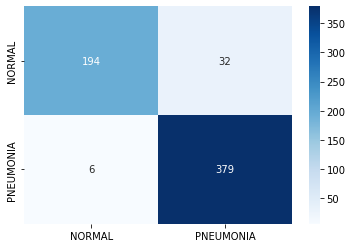

In [860]:
CM_threshold = confusion_matrix(y_test2, df_predictions_threshold['preds_for_cm'])

sns.heatmap(CM_threshold,
           annot=True,
            annot_kws={"size":10},
            cmap="Blues",
           xticklabels=label_names,
           yticklabels=label_names,
            fmt = 'd');   # Esto le da el formato correcto al número a mostrar en el heatmap

plt.yticks(va = 'center');
#plt.savefig('model_confusion_matrix_threshold.png', dpi=400, bbox_inches="tight");

# he REDUCIDO los 'False negative' en 3

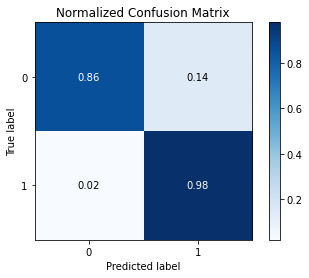

In [861]:
skplt.metrics.plot_confusion_matrix(y_test2, df_predictions_threshold['preds_for_cm'], normalize = True);
#plt.savefig('model_confusion_matrix_normalized_threshold.png', dpi=400, bbox_inches="tight");

In [848]:
# Calculate Precision and Recall
tn, fp, fn, tp = CM_threshold.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))

Recall of the model is 0.98
Precision of the model is 0.92


In [ ]:
'''

Tras sacar los valores en esa línea gris entre 0.35 - 0.65, que los revisará un médico, veo:

- 13 valores serán revisados por un médico
- He reducido en 3 los 'False Negative', que ahora serán parte de la revisión del médico
- El Recall y la precisión del modelo son iguales que antes de mover el 'threshold'

¿Con qué estrategia me quedo si arrojan mismo Recall y precisión?
1) Modelo inicial donde no muevo 'threshold' y no es necesario que el médico revise radiografías
2) Modelo donde muevo el 'threshold' y el médico revisa esas 13 radiografías

-> Arrojan el mismo Recall, de modo que me puedo quedar con el modelo inicial

''' 
